<a href="https://colab.research.google.com/github/udayabhargavi/World_Happiness_Report21B/blob/main/credit_card_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd

In [3]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [4]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

import warnings
warnings.filterwarnings("ignore")

In [5]:
df=pd.read_csv("/content/creditcard_2023[1].csv")
df

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0.0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0.0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0.0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0.0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11041,11041,0.961498,-0.543939,1.203240,-0.876476,-0.104809,0.191638,0.220967,-0.156970,2.992422,...,-0.144763,0.169196,0.008561,0.792287,0.528262,-1.843121,-0.140071,-0.024060,10804.86,0.0
11042,11042,0.980590,-0.535240,1.106308,-0.921220,-0.046165,0.310058,0.227566,-0.158102,2.946134,...,-0.151334,0.147702,-0.037784,0.152876,0.628010,-1.790006,-0.137057,-0.029677,7101.98,0.0
11043,11043,0.941496,-0.565920,1.178784,-0.957738,-0.077473,0.420623,0.184639,-0.117109,2.793721,...,-0.129854,0.232244,-0.010910,0.407813,0.489759,-1.866601,-0.146112,-0.055515,4295.16,0.0
11044,11044,0.754696,-0.433113,0.438823,-0.125691,0.491444,0.861226,0.488024,-0.107502,1.314418,...,-0.090576,0.218472,-0.051412,-1.185625,0.568393,-0.539891,-0.224516,-0.086625,950.30,0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11046 entries, 0 to 11045
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      11046 non-null  int64  
 1   V1      11046 non-null  float64
 2   V2      11046 non-null  float64
 3   V3      11046 non-null  float64
 4   V4      11046 non-null  float64
 5   V5      11046 non-null  float64
 6   V6      11046 non-null  float64
 7   V7      11046 non-null  float64
 8   V8      11046 non-null  float64
 9   V9      11046 non-null  float64
 10  V10     11046 non-null  float64
 11  V11     11046 non-null  float64
 12  V12     11046 non-null  float64
 13  V13     11046 non-null  float64
 14  V14     11046 non-null  float64
 15  V15     11046 non-null  float64
 16  V16     11046 non-null  float64
 17  V17     11046 non-null  float64
 18  V18     11046 non-null  float64
 19  V19     11046 non-null  float64
 20  V20     11045 non-null  float64
 21  V21     11045 non-null  float64
 22

In [7]:
df.describe()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,11046.000000,11046.000000,11046.000000,11046.000000,11046.000000,11046.000000,11046.000000,11046.000000,11046.000000,11046.000000,...,11045.000000,11045.000000,11045.000000,11045.000000,11045.000000,11045.000000,11045.000000,11045.000000,11045.000000,11045.000000
mean,5522.500000,0.289275,-0.379306,1.160554,-0.599833,0.296414,0.520460,0.445591,-0.156259,1.183819,...,-0.134332,-0.164478,-0.047329,0.162997,0.082168,0.107517,-0.202903,-0.096002,11964.237262,0.004346
std,3188.849871,0.603648,0.510983,0.718361,0.677674,0.648659,0.715619,0.500479,0.238518,0.918706,...,0.336047,0.564038,0.508838,1.103136,0.698946,1.227351,0.468592,0.641231,6942.553895,0.065783
min,0.000000,-2.513872,-20.936274,-1.887163,-3.996094,-4.298320,-18.642598,-3.038728,-4.074350,-2.170915,...,-5.775451,-6.238628,-14.452018,-3.674306,-6.810179,-3.733169,-5.273815,-8.758956,50.530000,0.000000
25%,2761.250000,-0.164938,-0.520236,0.696355,-0.937550,0.024293,0.106534,0.261070,-0.194486,0.581370,...,-0.214004,-0.535417,-0.198065,-0.561456,-0.332053,-0.815035,-0.330536,-0.137825,5964.330000,0.000000
50%,5522.500000,0.046835,-0.348873,1.052061,-0.515545,0.192501,0.394994,0.409261,-0.148963,1.086558,...,-0.154735,-0.167011,-0.069592,0.182683,0.126616,0.087327,-0.241289,-0.060290,11792.450000,0.000000
75%,8283.750000,0.949536,-0.157170,1.588649,-0.156584,0.407306,0.767068,0.605656,-0.088451,1.641623,...,-0.091719,0.186651,0.060336,0.863834,0.518403,0.971485,-0.102454,0.085144,18013.950000,0.000000
max,11045.000000,1.695400,1.828794,4.440555,2.240182,41.540257,9.295606,37.922674,1.315378,12.171681,...,6.830180,4.929620,18.418155,8.395836,10.424231,5.623285,17.987212,11.375357,24035.200000,1.000000


In [8]:
df.columns

Index(['id', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [9]:
df.isnull().sum()

,0
id,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [10]:
df.Class.value_counts()

,count
Class,
0.0,10997
1.0,48


In [11]:
df.Class.unique()

array([ 0.,  1., nan])

In [12]:
fig = px.pie(df, names='Class')
fig.show()

<Axes: xlabel='Class', ylabel='Count'>

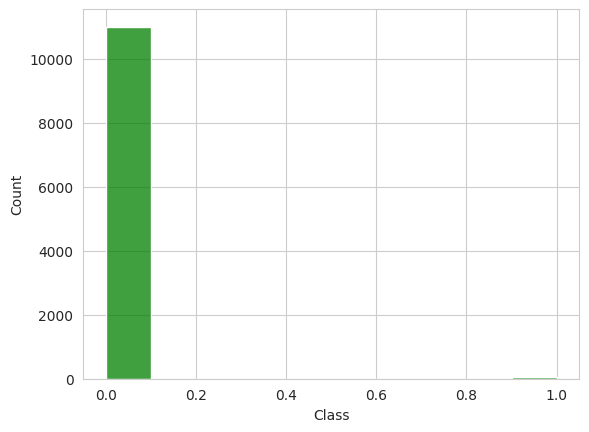

In [13]:
sns.set_style('whitegrid')
sns.histplot(df['Class'],color ='green', bins = 10)

In [30]:
df.dropna(inplace=True)
x = df.drop(columns=["Class"])
y = df["Class"]

In [31]:
x

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,0.091202,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.233984,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,0.361652,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.378223,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,0.247237,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11040,11040,0.950595,-0.499637,0.898081,-1.043533,0.016423,0.190547,0.294559,-0.153544,2.309809,...,-0.304915,-0.172140,-0.195053,0.060655,0.325017,0.370041,-2.422389,-0.175353,-0.054711,10873.58
11041,11041,0.961498,-0.543939,1.203240,-0.876476,-0.104809,0.191638,0.220967,-0.156970,2.992422,...,-0.333892,-0.144763,0.169196,0.008561,0.792287,0.528262,-1.843121,-0.140071,-0.024060,10804.86
11042,11042,0.980590,-0.535240,1.106308,-0.921220,-0.046165,0.310058,0.227566,-0.158102,2.946134,...,-0.292617,-0.151334,0.147702,-0.037784,0.152876,0.628010,-1.790006,-0.137057,-0.029677,7101.98
11043,11043,0.941496,-0.565920,1.178784,-0.957738,-0.077473,0.420623,0.184639,-0.117109,2.793721,...,-0.350733,-0.129854,0.232244,-0.010910,0.407813,0.489759,-1.866601,-0.146112,-0.055515,4295.16


In [32]:
y

,Class
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
11040,0.0
11041,0.0
11042,0.0
11043,0.0


In [33]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [34]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.3,random_state=42,stratify=y)

In [35]:
x_train

array([[-1.47565398e+00,  1.24218302e+00,  9.11133333e-02, ...,
        -1.33956891e-01,  1.07792964e-01, -6.30747066e-01],
       [-2.38990081e-01,  1.09266985e+00,  1.03038642e-01, ...,
        -5.43424965e-02,  7.55611570e-02, -4.47028256e-01],
       [ 4.76098350e-01, -1.06686750e+00, -2.36333189e-01, ...,
         4.17939191e-01, -2.51171643e-01,  9.03331359e-01],
       ...,
       [-1.05067818e+00,  1.18992005e+00, -7.70877041e-03, ...,
         7.67526547e-02,  1.30380198e-01, -1.39746650e+00],
       [ 2.87603549e-01,  1.29517943e+00, -5.50552890e-01, ...,
        -1.34840121e-01, -8.33182979e-04, -2.09372961e-01],
       [-7.90360897e-01,  3.45120861e-01, -1.54268145e+00, ...,
        -4.35706922e-01,  2.86779129e-01,  5.62084134e-01]])

In [36]:
x_test

array([[ 1.49698117e+00,  1.19864055e+00, -1.73482465e-01, ...,
        -3.93327477e-01, -2.15771696e-02,  1.23978330e+00],
       [-7.93810885e-01,  1.16930124e+00, -3.52025213e-02, ...,
        -1.67513299e-01,  2.67309389e-02,  6.82660497e-01],
       [ 1.14131877e+00, -9.88151217e-01, -5.01517062e-02, ...,
        -4.39076219e-01,  3.34911278e-03, -3.43874225e-01],
       ...,
       [-1.07576900e+00,  1.04093657e+00, -1.11748325e+00, ...,
         2.39707147e-02,  1.21461580e-01,  1.21119455e+00],
       [-1.60769443e+00, -5.38738556e-01, -7.93331258e-02, ...,
        -2.75757571e+00, -4.68534357e+00,  6.59310684e-01],
       [-1.40069515e+00,  1.09875708e+00, -4.07982855e-01, ...,
        -2.08933457e-01,  1.69992794e-02, -4.67593665e-01]])

In [37]:
y_train

,Class
817,0.0
4760,0.0
7040,0.0
3670,0.0
8920,0.0
...,...
7866,0.0
10050,0.0
2172,0.0
6439,0.0


In [38]:
y_test

,Class
10295,0.0
2991,0.0
9161,0.0
9954,0.0
4897,0.0
...,...
9140,0.0
7589,0.0
2092,0.0
396,0.0


In [39]:
x_train.shape

(7731, 30)

In [40]:
y_train.shape

(7731,)

In [41]:
# prompt: logisticregression without nan values
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [42]:
model.score(x_train,y_train)

0.9994826025093778

In [43]:
model.score(x_test,y_test)

0.9990947495473748

In [44]:
y_predict = model.predict(x_test)

In [45]:
y_predict

array([0., 0., 0., ..., 0., 0., 0.])

In [46]:
accuracy=model.score(x_test,y_test)
accuracy

0.9990947495473748

In [47]:
print(accuracy_score(y_test, y_predict))

0.9990947495473748


In [48]:
model2 = SVC()
model2.fit(x_train, y_train)

SVC()

In [49]:
Y_pred2 = model2.predict(x_test)
print(accuracy_score(y_test, Y_pred2))

0.9978877489438744


In [50]:
random_test_data=x_test[0].reshape(1,-1)

In [51]:
prediction=model.predict(random_test_data)
print("Fraudulent" if prediction[0] == 1 else "Non-Fraudulent")

Non-Fraudulent
